In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import os
import pandas as pd
import random
from utilityFunctions import show_heatmaps2

In [2]:
def load_csv_to_matrix(file_path, response_type, colour_index, matrix_size):
    df = pd.read_csv(file_path)
    df = df[(df['practice_trial'] != 1) & (df['response_type'] == response_type)]

    colour1 = df['colour1']
    colour2 = df['colour2']
    target_preference = df['response']

    matrix = np.zeros((matrix_size, matrix_size))
    for c1, c2, tp in zip(colour1, colour2, target_preference):
        I = colour_index[c1]
        j = colour_index[c2]
        matrix[I, j] = tp

    return matrix.astype(int)

def get_subject_files(directory):
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]

def compute_average_matrices(group, response_type, colour_index, matrix_size):
    matrices = [load_csv_to_matrix(file, response_type, colour_index, matrix_size) for file in group]
    avg_matrices = np.mean(matrices, axis=0) if matrices else np.zeros((matrix_size, matrix_size))
    return 7 - avg_matrices

def perform_mds_and_plot(matrices, colour_index, n_components=2):
    mds = MDS(n_components=n_components, dissimilarity="precomputed", random_state=42)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()
    
    color_labels = list(colour_index.keys())
    
    for ax, (title, matrix) in zip(axes, matrices.items()):
        dist_matrix = (matrix + matrix.T) / 2  # Ensure symmetry
        embedding = mds.fit_transform(dist_matrix)
        
        colors = list(colour_index.keys())
        ax.scatter(embedding[:, 0], embedding[:, 1], c=colors, s=400)
        for i, label in enumerate(colors):
            ax.text(embedding[i, 0], embedding[i, 1], label, fontsize=14)
        
        ax.set_title(title, fontsize=18)
        ax.set_xlabel("MDS Dimension 1", fontsize =16)
        ax.set_ylabel("MDS Dimension 2", fontsize=16)
        ax.tick_params(axis='both', labelsize=15)
        ax.set_aspect('equal')
        
    plt.tight_layout()
    plt.show()

In [3]:
unique_colours = np.array(['#d2b700', '#db8b08', '#c7512c', '#c13547', '#a03663', '#753a7a', '#4b488e', '#005692', '#006a8b', '#007b75', '#008a52', '#9aa400'])
colour_index = {colour: idx for idx, colour in enumerate(unique_colours)}
matrix_size = len(unique_colours)

directory = 'raw_data/202411_data_without19'
subject_files = get_subject_files(directory)
random.shuffle(subject_files)

half = len(subject_files) // 2
group1, group2 = subject_files[:half], subject_files[half:]

matrices = {
    "Preference Group 1": compute_average_matrices(group1, 'preference', colour_index, matrix_size),
    "Preference Group 2": compute_average_matrices(group2, 'preference', colour_index, matrix_size),
    "Similarity Group 1": compute_average_matrices(group1, 'similarity', colour_index, matrix_size),
    "Similarity Group 2": compute_average_matrices(group2, 'similarity', colour_index, matrix_size),
}

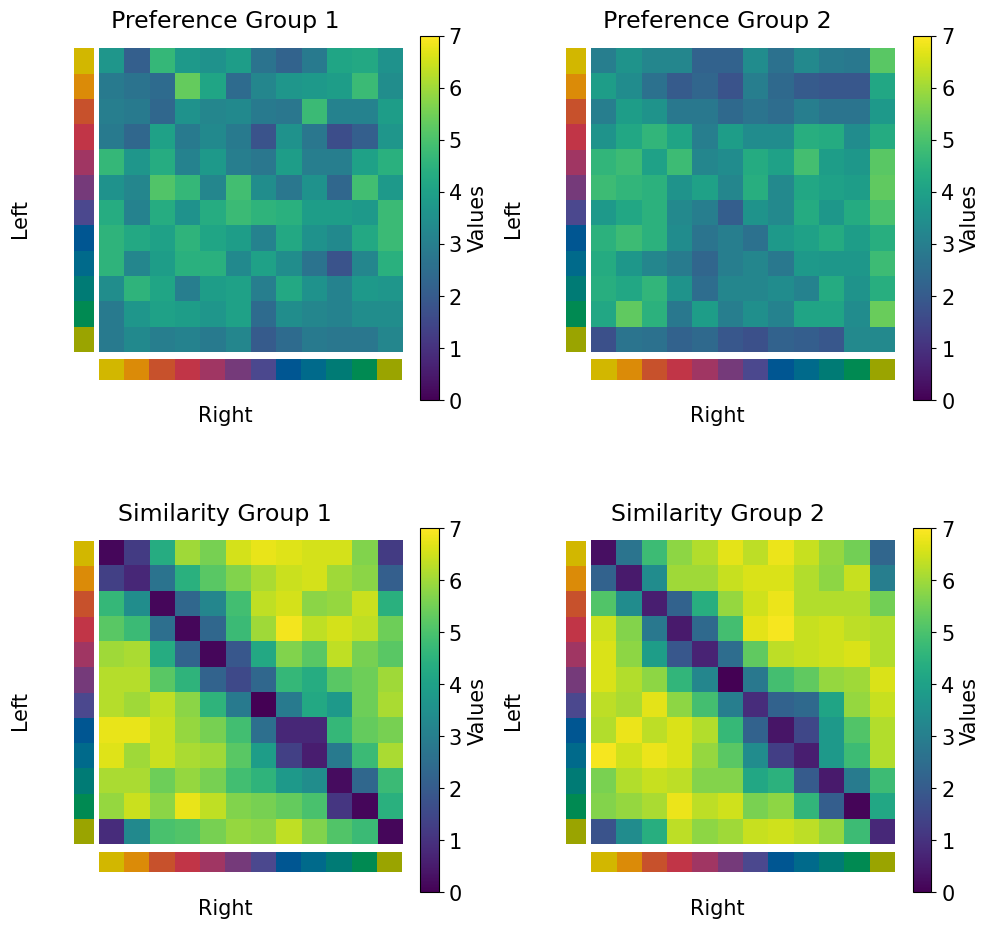

In [4]:
show_heatmaps2(vmin_val=0, vmax_val=7, matrices=list(matrices.values()), titles=list(matrices.keys()), nrows=2, ncols=2, cbar_label="Values", color_labels=unique_colours)

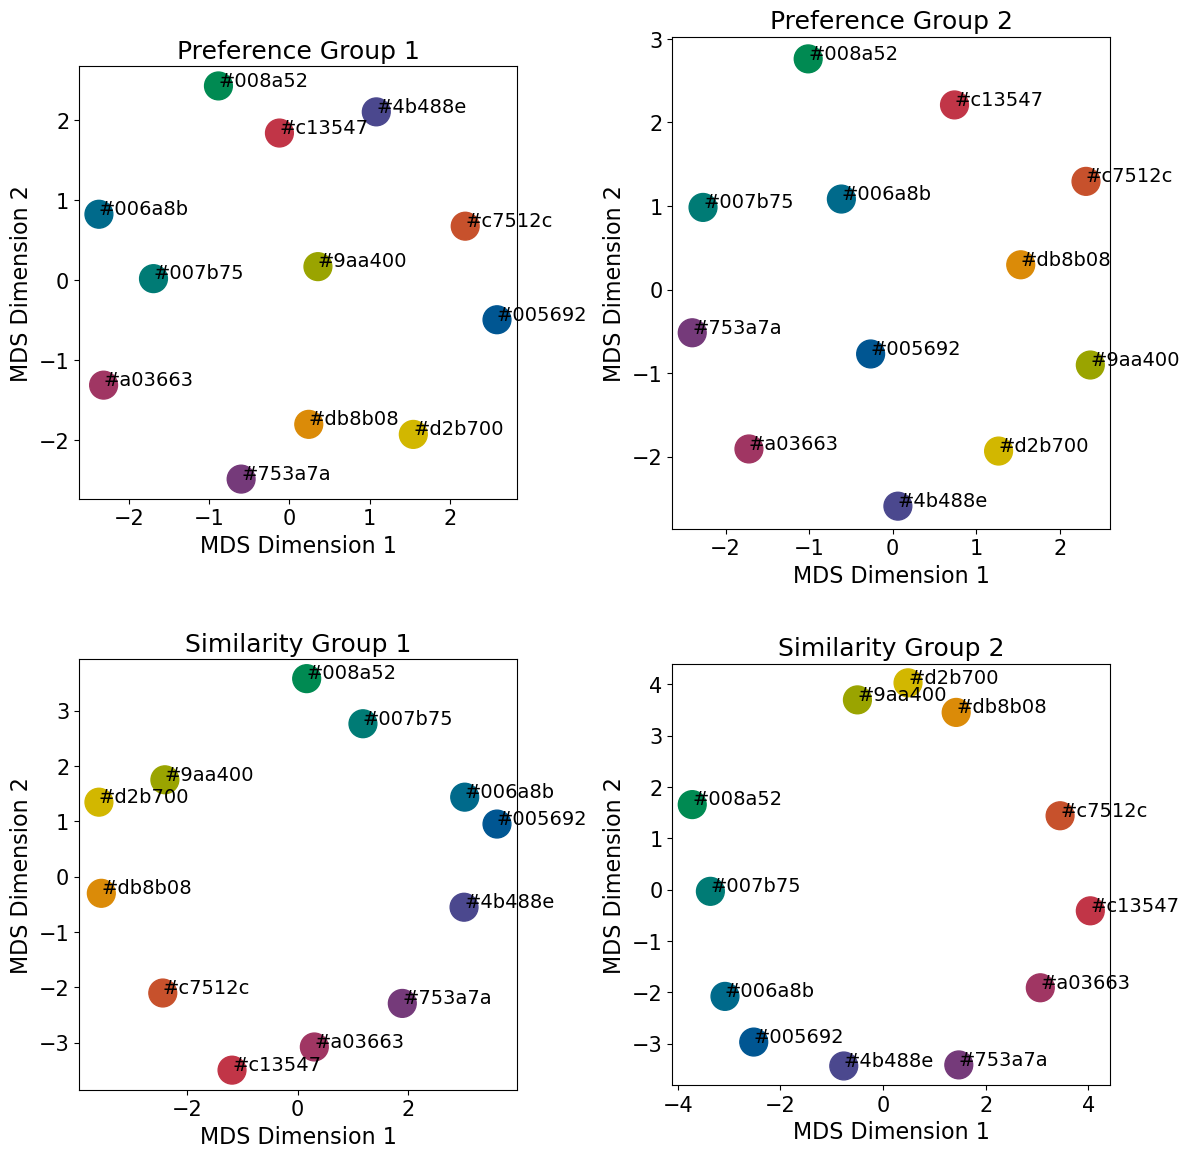

In [6]:
perform_mds_and_plot(matrices, colour_index)